# Prediction using Supervised ML


**Objective** - Predict the Score of an student based on the number of hours studied.

**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Performed by - Darshan Jain

By - GRIP @ The Sparks Foundation

In [2]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [3]:
#reading the Data
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url) #using pandas to read the csv file
print("Data import was successful")

Data import was successful


# EDA: Exploratary Data Analysis

In [4]:
#Prinitng the data
data.head(n=10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.index = np.arange(1, len(data)+1)  #changing the starting index from 0 to 1

In [6]:
data.head(n=5)

,Hours,Scores
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30


In [7]:
#checking for null values if any
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


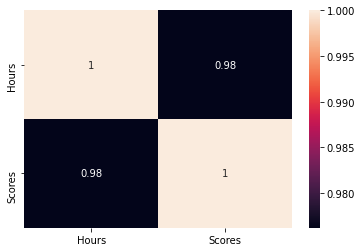

In [9]:
#correlation between the two columns
corr=data.corr()
sn.heatmap(corr, annot=True)
plt.show()

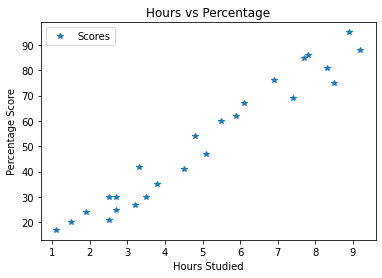

In [10]:
#Plotting the graph for the Data
data.plot(x="Hours",y="Scores",style='*')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

# Performing Linear Regression using Scikit Learn

In [11]:
#importing libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

#train,test split
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#Training the data
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [13]:
print("The regression line coefficient is :",model.coef_) #M
print("The regression line intercept is :",model.intercept_) #C

The regression line coefficient is : [9.91065648]
The regression line intercept is : 2.018160041434662


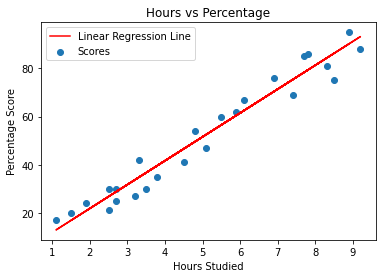

In [15]:
# Plotting the regression line
line = model.coef_*X+model.intercept_  #Y=mx+c


# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color="red",label="Linear Regression Line")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.legend(['Linear Regression Line','Scores'])
plt.show()

In [16]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
# Testing with our data
hours = [[9.25]]
own_pred = model.predict(hours)
print("If a student studies 9.25 Hours. The score they can obtain is = {}".format(own_pred))

If a student studies 9.25 Hours. The score they can obtain is = [93.69173249]


# Calculating Errors 

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error = ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error = ",mean_squared_error(y_test,y_pred))
print("R2 Score = ",r2_score(y_test,y_pred))

Mean Absolute Error =  4.183859899002982
Mean Squared Error =  21.598769307217456
R2 Score =  0.9454906892105354


# Conclusion of the Task
If a student stuides for 9.25 hours, we can predict that the score obtained could be **93.69** from the given data.

---


